# Overview
### In this notebook, we aim to:

### (a) Perform  Data Analysis  on the Netflix dataset.
### (b) Generate insights and recommendations based on the findings.

## 1. Import Libraries


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Data


In [6]:
data=pd.read_csv("netflix.csv")
# Display the first few rows of the dataset
data.head() 
#use apply function and then split to split the listed in, check explode function also

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Data Preprocessing
### 3.1. Overview of Data

In [8]:
# Get a summary of the dataset
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### 3.2. Handle Missing Values


In [10]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [11]:
##### There are significant number of null values in director, cast and country columns, and few null values in date_added,
##### rating and duration columns

#####  Filling null values in director, cast and country as unknown

In [13]:
data2=data.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown'})


In [14]:
data2.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

##### Using "release_year" column, create a another  column called "release_date", that has January 1 as default

In [16]:
# Convert release_year to date format (January 1st of that year)

data2['release_date'] = pd.to_datetime(data2['release_year'].astype('Int64').astype('str') + '-01-01', errors='coerce')


#### Fill the null values in "date_added" column with corresponding "release_date" values


In [18]:

data2['date_added'] = data2['date_added'].fillna(data2['release_date'])
#drop the release date column
data2 = data2.drop(columns=['release_date'])



#### Convert date_added column and "release_year" column to date time format

In [20]:
data2["date_added"]=data2["date_added"].astype("datetime64[ns]")


#### Replace null values in "rating" and "duration" with most common values

In [22]:
mode_rating = data2['rating'].mode()[0]
mode_duration= data2['duration'].mode()[0]

data2 = data2.fillna({'rating': mode_rating, 'duration': mode_duration})

In [23]:
data2.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


#### Data is now cleaned

### 3.3. Check for Duplicates


In [27]:
# Check for duplicate rows
duplicates = data[data.duplicated()]

In [28]:
duplicates.size


0

##### zero duplicate rows

## 4.Data Analysis 


In [31]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Create a new column called "Genre" using the first word in listed_in column

In [33]:
data2["Genre"]=data2["listed_in"].str.split(",").str[0] 
# as "listed in" is an object data type, strings are object data types,
#to use string functions in pandas we need to first call the str method to use the split

#### Create a new column called "Lead Actor" using the first word in cast

In [35]:
data2["Lead Cast"]=data2["cast"].str.split(",").str[0]

In [322]:
data2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre,Lead Cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,Unknown
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,Sami Bouajila
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Cult Movies,Mark Ruffalo
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Kids' TV,Unknown
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Comedies,Jesse Eisenberg
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies,Tim Allen


### (a) Analysis on movies

In [37]:
movies = data2[data2["type"] == "Movie"].copy()


In [38]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      6131 non-null   object        
 4   cast          6131 non-null   object        
 5   country       6131 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6131 non-null   object        
 9   duration      6131 non-null   object        
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
 12  Genre         6131 non-null   object        
 13  Lead Cast     6131 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 718.5+ KB


In [106]:
movies["duration"] = movies["duration"].astype(str)


In [108]:
def spacesplit(x):
    return x.split(" ")[0]
movies["duration_min"]=movies["duration"].apply(spacesplit)



In [320]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre,Lead Cast,duration_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,Unknown,90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,Vanessa Hudgens,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas,Kofi Ghanaba,125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Comedies,Melissa McCarthy,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Dramas,Luna Wedler,127


In [112]:
movies["duration_min"]=movies["duration_min"].astype("int64")

Text(0.5, 1.0, 'TMovies with the highest duration,Top Ten')

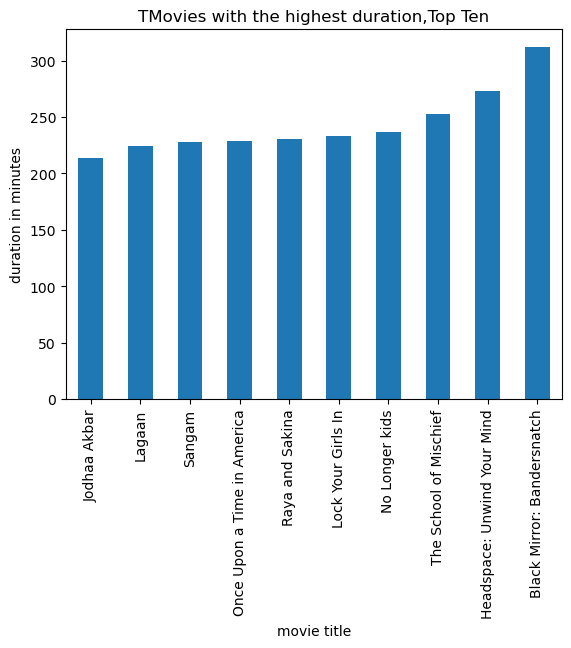

In [114]:
a=movies.groupby("title")["duration_min"].max().sort_values(ascending=False).head(10).sort_values().plot(kind='bar')
plt.xlabel("movie title")
plt.ylabel("duration in minutes")
plt.title("Movies with the highest duration,Top Ten")

#### Black Mirror: Bandersnatch has the highest duration time from movies

<Axes: ylabel='count'>

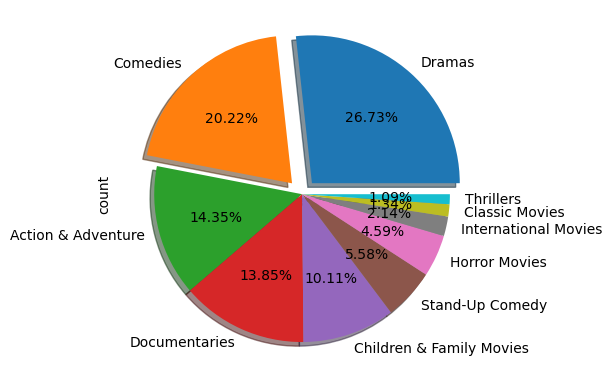

In [120]:
movies["Genre"].value_counts().sort_values(ascending=False).head(10).plot(kind="pie",shadow=True,explode=[0.1,0.1,0,0,0,0,0,0,0,0],autopct="%1.2f%%")



#### Among the movie genres produced, dramas make up the majority, followed by comedies.




 

Text(0.5, 1.0, 'Number of Movie releases per year')

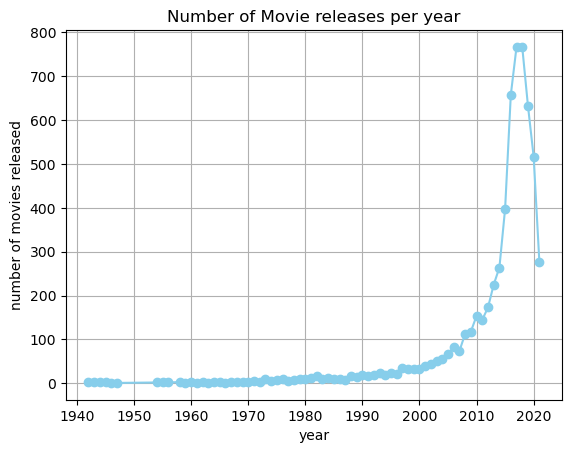

In [288]:
a=movies.groupby("release_year")["show_id"].count().plot(kind='line',marker='o',grid=True,color='skyblue')
a
plt.xlabel("year")
plt.ylabel("number of movies released")
plt.title("Number of Movie releases per year")

#### The number of movies released grew exponentially from 1940 until just before 2020, followed by a sharp decline.







#### most of the movies were rated as TV-MA


In [207]:
def commasplit(x):
    return x.split(",")[0]
movies["country"]=movies["country"].apply(commasplit)

Text(0.5, 1.0, 'Top ten countries with the highest number of movies releases ')

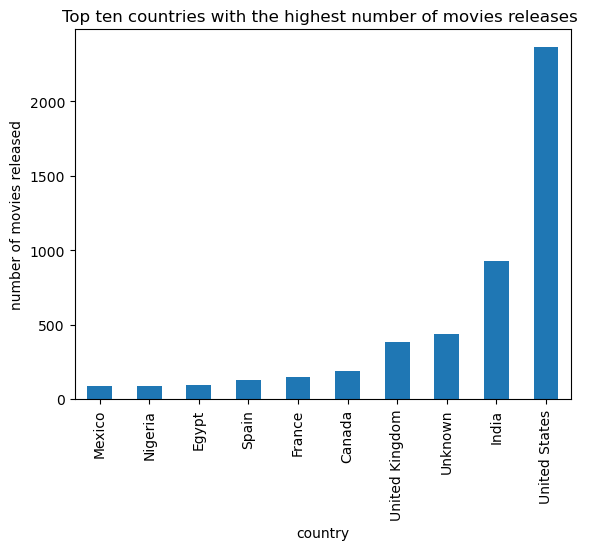

In [291]:
movies["country"].value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='bar')

plt.ylabel("number of movies released")
plt.title("Top ten countries with the highest number of movies releases ")

### United states is the country with highest movies releases, followed by india

Text(0.5, 1.0, 'Top ten actors in Lead roles')

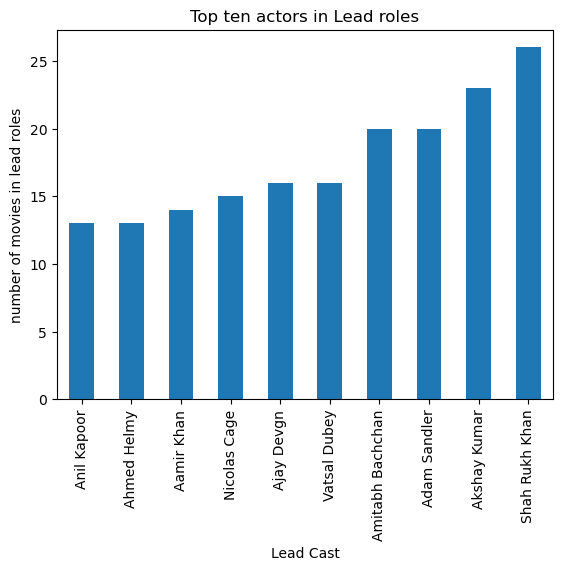

In [293]:
a=movies["Lead Cast"].value_counts().sort_values(ascending=False)
c=a.iloc[1:]
c.head(10).sort_values().plot(kind='bar')

plt.ylabel("number of movies in lead roles")
plt.title("Top ten actors in Lead roles")

#### Shah rukh khan tops the number of movies as the LEad cast

Text(0.5, 1.0, 'Top ten Directors that has directed the most number of movies')

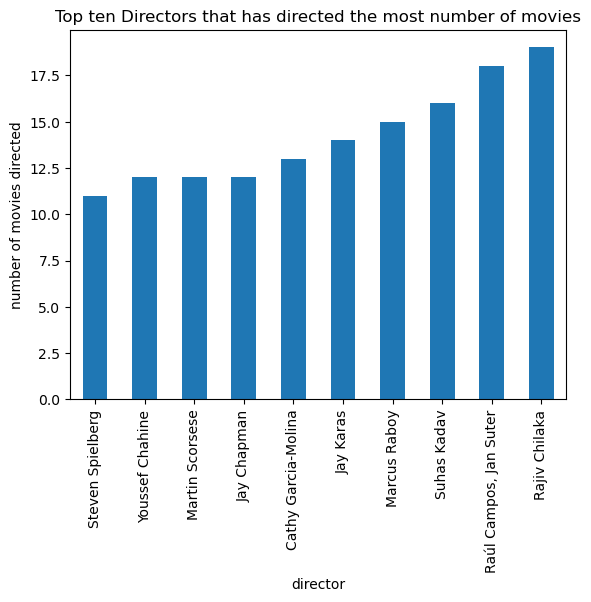

In [315]:

b1=movies.groupby("director")["title"].count().sort_values(ascending=False).head(11)
a1=b1.iloc[1:]
a1.sort_values().plot(kind='bar')
plt.ylabel("number of movies directed")
plt.title("Top ten Directors that has directed the most number of movies")

#### RajivChilaka directed the most numbr of movies

movies.columns

In [ ]:
def spacesplit(x):
    return x.split(" ")[0]
movies["duration_min"]=movies["duration"].apply(spacesplit)



### (b) Analysis on Season based shows

In [419]:
season=data2[data2['type']!="Movie"]


In [483]:
def spacesplit(x):
    return x.split(" ")[0]
season=season.copy()
season.loc[:,'duration_in_seasons'] = season['duration'].apply(spacesplit)


season["duration_in_seasons"]=season["duration_in_seasons"].astype('int64')


<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 1 to 8803
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   show_id              2676 non-null   object        
 1   type                 2676 non-null   object        
 2   title                2676 non-null   object        
 3   director             2676 non-null   object        
 4   cast                 2676 non-null   object        
 5   country              2676 non-null   object        
 6   date_added           2676 non-null   datetime64[ns]
 7   release_year         2676 non-null   int64         
 8   rating               2676 non-null   object        
 9   duration             2676 non-null   object        
 10  listed_in            2676 non-null   object        
 11  description          2676 non-null   object        
 12  Genre                2676 non-null   object        
 13  Lead Cast            2676 non-null   o

C:\Users\acer\AppData\Local\Temp\ipykernel_11296\360020406.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2' '1' '1' ... '3' '1' '2']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  season.loc[:,'duration_in_seasons'] = season['duration'].apply(spacesplit)


In [436]:
season.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre,Lead Cast,duration_in_seasons
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,Ama Qamata,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,Sami Bouajila,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries,Unknown,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,Mayur More,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,TV Dramas,Kate Siegel,1


In [489]:
a=season[season["duration_in_seasons"]==season["duration_in_seasons"].max()]
a


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre,Lead Cast,duration_in_seasons
548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,Romantic TV Shows,Ellen Pompeo,17


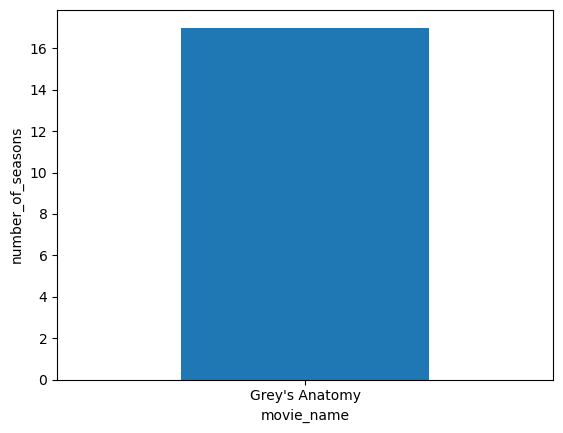

In [548]:
a.groupby("title")["duration_in_seasons"].max().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("movie_name")
plt.ylabel("number_of_seasons");


#### Grey's Anatomy	is the TV show with the maximum number of seasons

Text(0.5, 1.0, 'Frequency of Shows by Number of Seasons')

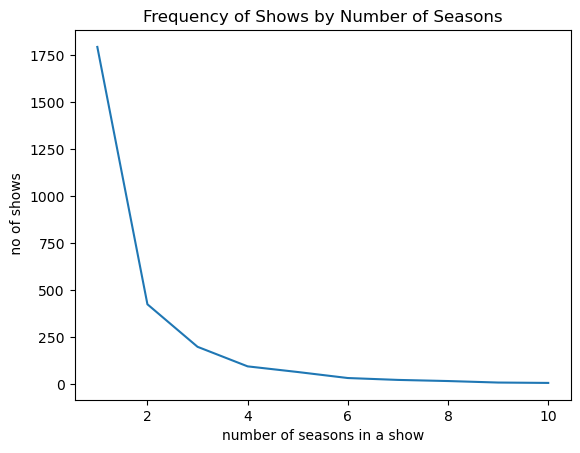

In [554]:
season["duration_in_seasons"].value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='line')
plt.xlabel("number of seasons in a show")
plt.ylabel(" no of shows")
plt.title("Frequency of Shows by Number of Seasons")

#### WE can see that most shows have low number of seasons, the shows with more number of seasons are less

Text(0.5, 1.0, 'Number of shows releases per year')

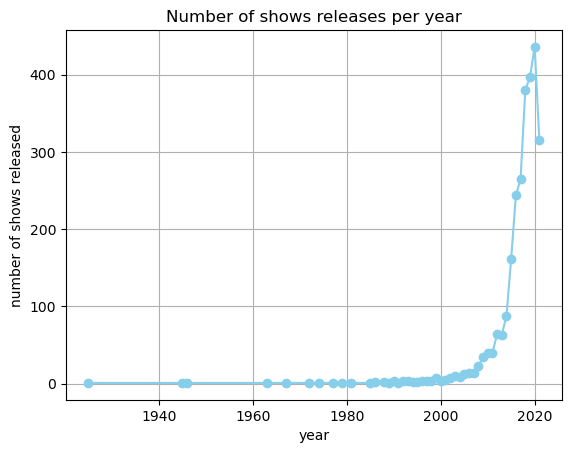

In [564]:
a2=season.groupby("release_year")["show_id"].count().plot(kind='line',marker='o',grid=True,color='skyblue')
a2
plt.xlabel("year")
plt.ylabel("number of shows released")
plt.title("Number of shows releases per year")

#### The number of shows released grew exponentially from 1940 until just before 2020, followed by a sharp decline.


<Axes: ylabel='count'>

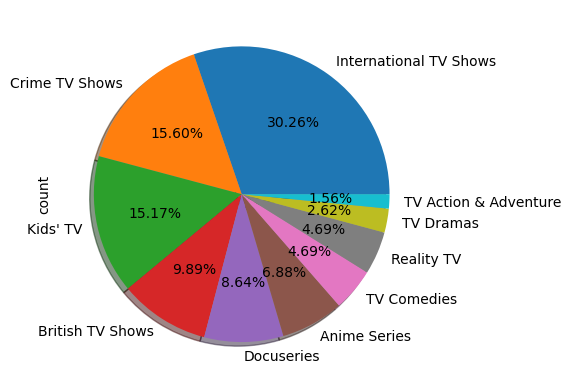

In [566]:
season["Genre"].value_counts().sort_values(ascending=False).head(10).plot(kind="pie",shadow=True,autopct="%1.2f%%")


#### Among the tv shows released , international tv shows  make up the majority, followed by Crime Tv shows.


Text(0.5, 1.0, 'Top ten countries with the highest number of season type show releases ')

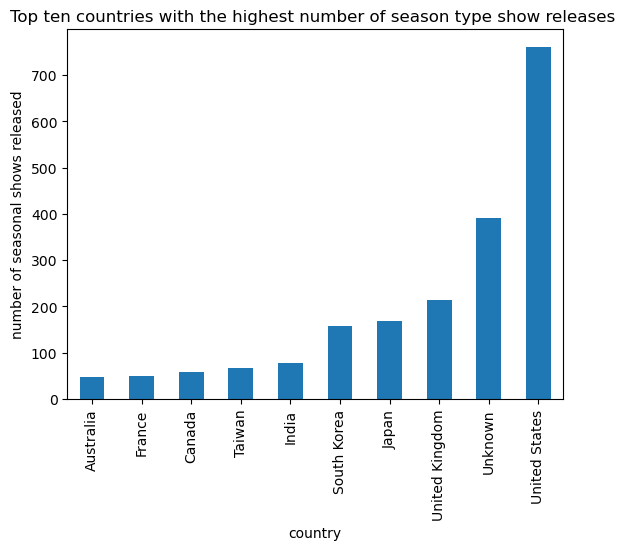

In [571]:
season["country"].value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='bar')

plt.ylabel("number of seasonal shows released")
plt.title("Top ten countries with the highest number of season type show releases ")

### United states is the country with highest seaonal shows released, 

Text(0.5, 1.0, 'Top ten show actors in Lead roles')

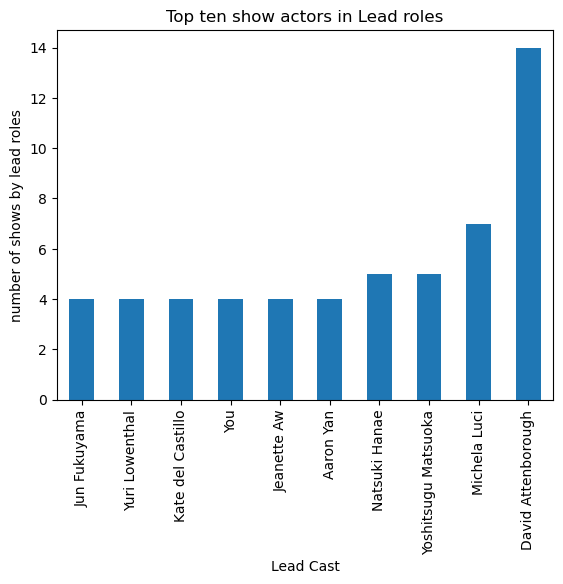

In [580]:
a=season["Lead Cast"].value_counts().sort_values(ascending=False)
c=a.iloc[1:]
c.head(10).sort_values().plot(kind='bar')

plt.ylabel("number of shows by lead roles")
plt.title("Top ten show actors in Lead roles")

#### David Attenborough has the most Tv shows as him the lead

Text(0.5, 1.0, 'seasonal shows with the highest duration,Top Ten')

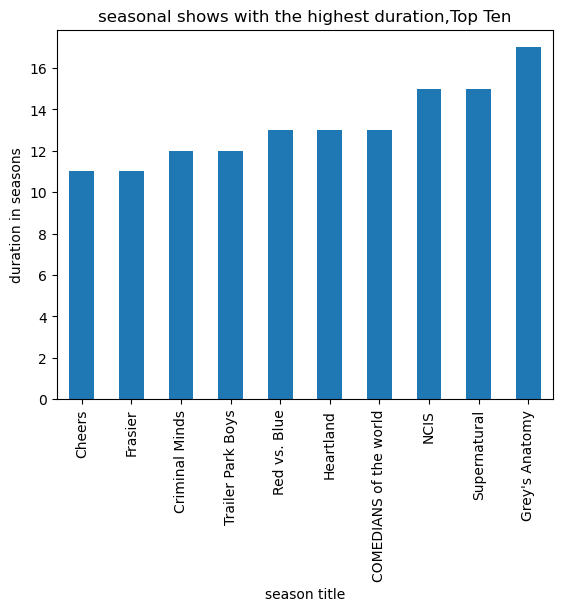

In [589]:
a=season.groupby("title")["duration_in_seasons"].max().sort_values(ascending=False).head(10).sort_values().plot(kind='bar')
plt.xlabel("season title")
plt.ylabel("duration in seasons")
plt.title("seasonal shows with the highest duration,Top Ten")


#### Greys Anatomy:  has the highest duration time from seasonal shows

In [583]:
season.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 1 to 8803
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   show_id              2676 non-null   object        
 1   type                 2676 non-null   object        
 2   title                2676 non-null   object        
 3   director             2676 non-null   object        
 4   cast                 2676 non-null   object        
 5   country              2676 non-null   object        
 6   date_added           2676 non-null   datetime64[ns]
 7   release_year         2676 non-null   int64         
 8   rating               2676 non-null   object        
 9   duration             2676 non-null   object        
 10  listed_in            2676 non-null   object        
 11  description          2676 non-null   object        
 12  Genre                2676 non-null   object        
 13  Lead Cast            2676 non-null   o

In [594]:
season.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Genre', 'Lead Cast', 'duration_in_seasons'],
      dtype='object')

Text(0, 0.5, 'average number of seasons')

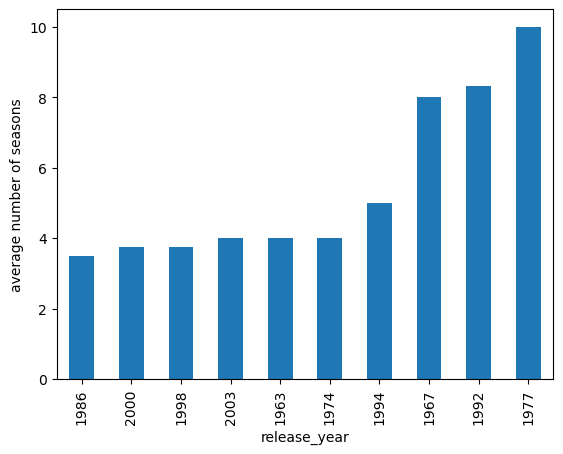

In [606]:
season.groupby("release_year")["duration_in_seasons"].mean().sort_values(ascending=False).head(10).sort_values().plot(kind='bar')
plt.ylabel("average number of seasons") 

#### seasosnal shows released in 1977 has the highest averagenumber of seasons, around 10

Text(0.5, 1.0, 'Top ten show Directors that has directed the most number of movies')

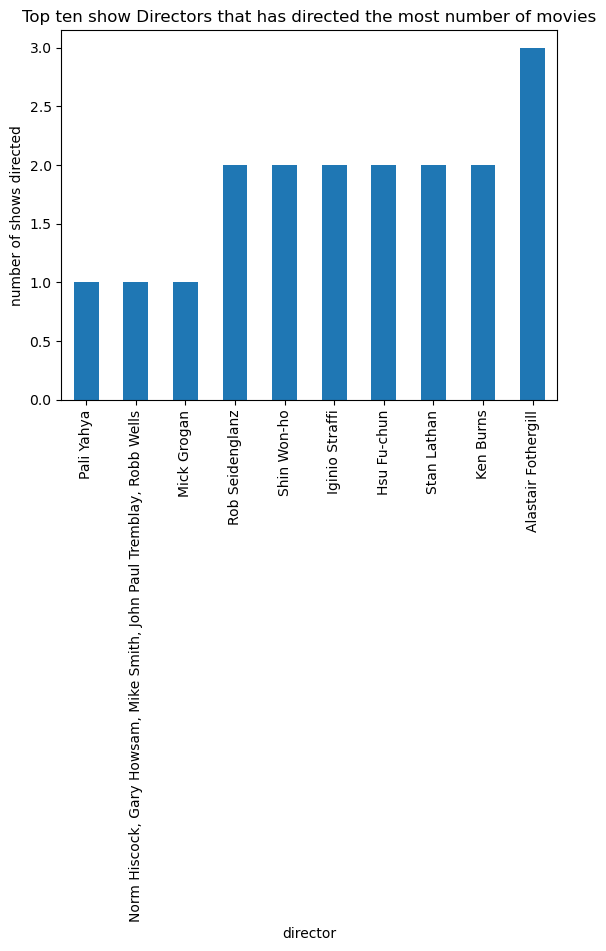

In [616]:
b1=season.groupby("director")["title"].count().sort_values(ascending=False).head(11)
a1=b1.iloc[1:]
a1.sort_values().plot(kind='bar')
plt.ylabel("number of shows directed")
plt.title("Top ten show Directors that has directed the most number of movies")

### Alestair Fothergail has directed the most number among TV shows
